# Cochella vs Normal Tour Analysis 

Exploring the setlists of 4 artists' Coachella Setlist and shows in the year prior or after the Coachella weekends. 

## Analysis Setup

### Imports and Configurations

In [1]:
# Standard imports to run concert_analytics

import sys
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.path.dirname(""), "../../"))
sys.path.insert(0, PROJECT_ROOT)

import pandas as pd

from postgres import fetch_table,run_query

import logging

logging.basicConfig(level=logging.INFO)  # DEBUG < INFO < WARNING < ERROR < CRITICAL

pd.set_option("display.max_columns", None)  # Show all columns

project_name = 'Coachella-vs-Normal-Tour'


### Gather Data into CSV and dataframe

In [2]:
# fetch setlist and spotify metadata

query="""
select 
	*
from 
	analytics_project.project_002_coachella_master_setlist_data
"""

df = run_query(query)
df['track_song_name'] = df['track_song_name'].apply(
    lambda x: x if len(x) <= 25 else x[:22] + "..."
)
df.to_csv('coachella_vs_normal_tool_master_setlist_data.csv',index=False)
df.head()

,artist_name_hint,event_set_song_id,event_id,event_date,event_info,event_url,event_tour_id,event_tour,venue_id,venue_name,venue_city,venue_state_code,venue_country_code,venue_latitude,venue_longitude,set_index,set_index_reversed,encore_index,encore_flag,song_index,song_index_reversed,song_position_in_set_index,song_position_in_set_index_reversed,song_name,song_info,song_cover_flag,song_cover_artist_mbid,song_cover_artist_name,song_with_flag,song_with_artist_mbid,song_with_artist_name,song_last_event_set_song_id,song_last_event_id,song_last_event_date,is_coachella,coachella_weekend,days_before_first_coachella_date,days_after_last_coachella_date,coachella_analytics_period,artist_display_name,album_id,album_url,album_uri,album_type,album_name,album_total_tracks,album_release_date,album_image_url,album_popularity,track_id,track_url,track_uri,track_disk_number,track_duration_seconds,track_name,track_number,track_popularity,track_irsc,event_total_songs,event_total_sets,event_total_encore_songs,event_total_non_encore_songs,track_song_name
0,BillieEilish,918efe83e9e1616231fc070e4a1773c4,138da921,2021-09-25,None,https://www.setlist.fm/setlist/billie-eilish/2...,None,None,352a9e99a7f80f092a181f4b140a3843,Great Lawn in Central Park,New York,NY,US,40.714269,-74.005973,1,1,0,False,4,3,4,3,Your Power,None,False,None,None,False,None,None,e7e056cb9ea0d10f52710f2c3c20d4d5,4b8df302,2021-10-02,False,None,203.0,NaN,Before Coachella,Billie Eilish,0JGOiO34nwfUdDrD612dOp,https://api.spotify.com/v1/albums/0JGOiO34nwfU...,spotify:album:0JGOiO34nwfUdDrD612dOp,album,Happier Than Ever,16.0,2021-07-30,https://i.scdn.co/image/ab67616d0000b2732a038d...,87.0,042Sl6Mn83JHyLEqdK7uI0,https://api.spotify.com/v1/tracks/042Sl6Mn83JH...,spotify:track:042Sl6Mn83JHyLEqdK7uI0,1.0,245.0,Your Power,12.0,78.0,USUM72105934,6,1,0,6,Your Power
1,BillieEilish,abe9800f5d9b0c043066e80827b2af3b,138da921,2021-09-25,None,https://www.setlist.fm/setlist/billie-eilish/2...,None,None,352a9e99a7f80f092a181f4b140a3843,Great Lawn in Central Park,New York,NY,US,40.714269,-74.005973,1,1,0,False,3,4,3,4,Oxytocin,None,False,None,None,False,None,None,c947cc9253043403246357196b208808,4b8df302,2021-10-02,False,None,203.0,NaN,Before Coachella,Billie Eilish,0JGOiO34nwfUdDrD612dOp,https://api.spotify.com/v1/albums/0JGOiO34nwfU...,spotify:album:0JGOiO34nwfUdDrD612dOp,album,Happier Than Ever,16.0,2021-07-30,https://i.scdn.co/image/ab67616d0000b2732a038d...,87.0,4t2OeILB07eMGTXSUbMPEu,https://api.spotify.com/v1/tracks/4t2OeILB07eM...,spotify:track:4t2OeILB07eMGTXSUbMPEu,1.0,210.0,Oxytocin,5.0,75.0,USUM72104675,6,1,0,6,Oxytocin
2,BillieEilish,d96d09c44dd8d46075f400fafb29838c,138da921,2021-09-25,None,https://www.setlist.fm/setlist/billie-eilish/2...,None,None,352a9e99a7f80f092a181f4b140a3843,Great Lawn in Central Park,New York,NY,US,40.714269,-74.005973,1,1,0,False,2,5,2,5,my future,None,False,None,None,False,None,None,57323d59ed2e8183ec81cbc81b8c4491,4b8df302,2021-10-02,False,None,203.0,NaN,Before Coachella,Billie Eilish,0JGOiO34nwfUdDrD612dOp,https://api.spotify.com/v1/albums/0JGOiO34nwfU...,spotify:album:0JGOiO34nwfUdDrD612dOp,album,Happier Than Ever,16.0,2021-07-30,https://i.scdn.co/image/ab67616d0000b2732a038d...,87.0,3YUMWmx8EJq0DurfuIwoGh,https://api.spotify.com/v1/tracks/3YUMWmx8EJq0...,spotify:track:3YUMWmx8EJq0DurfuIwoGh,1.0,210.0,my future,4.0,74.0,USUM72013019,6,1,0,6,my future
3,BillieEilish,469c4b62e43050d4c94de784b5a4be69,138da921,2021-09-25,None,https://www.setlist.fm/setlist/billie-eilish/2...,None,None,352a9e99a7f80f092a181f4b140a3843,Great Lawn in Central Park,New York,NY,US,40.714269,-74.005973,1,1,0,False,6,1,6,1,Happier Than Ever,None,False,None,None,False,None,None,f0ee08af3f38422f7c36cefd815179e1,4b8df302,2021-10-02,False,None,203.0,NaN,Before Coachella,Billie Eilish,0JGOiO34nwfUdDrD612dOp,https://api.spotify.com/v1/albums/0JGOiO34nwfU...,spotify:album:0JGOiO34nwfUdDrD612dOp,album,Happier Than Ever,16.0,2021-07-30,https://i.scdn.co/image/ab67616d0000b2732a038d...,87.0,4RVwu0g32

### Plotting Imports

In [3]:
from plotnine import ggplot, aes, geom_col, labs, theme, element_text, element_rect, scale_x_datetime, element_blank,element_line

#Colors
gaffer_colors = {
    "lightAmpOrange": "#FB9E50"
    , "floodPink": "#F986BA"
    , "setlistBlue": "#3C7DC4"
    , "spotRed": "#D64848"
    , "ampOrange": "#F25C05"
    , "lightBlue":"#A7ECF5"
    , "encorePurple": "#5D4E8C"
    , "stageGreen": "#33C27D"
    , "clockYellow": "#F6D357"
    , "spotlightCream": "#FAF3E0"
    , "gafferGrey": "#777777"
    , "backstageBlack":"#1C1C1C"
}

default_labels = labs(
        caption="Source: setlist.fm sourced via Concert Analytics"
    )

def gaffer_theme(fig_width=9,fig_height=16,panel_grid='x'):
    #panel_grid can be x, y, or both
    #Basic Fonts
    base_family_axis="Courier New"
    base_family_title="Helvetica"

    # Define the grid line element once
    grid_line = element_line(
        color=gaffer_colors["gafferGrey"],
        linetype="dashed",
        size=0.5
    )

    # Determine which grid lines to show
    panel_grid_y = grid_line if panel_grid in ("y", "both") else element_blank()
    panel_grid_x = grid_line if panel_grid in ("x", "both") else element_blank()

    gaffer_theme = theme(
        # aspect_ratio = 9 / 16
        # , 
        figure_size=(fig_width,fig_height)
        
        # Backgrounds
        , plot_background=element_rect(fill=gaffer_colors["spotlightCream"], color=None)
        , panel_background=element_rect(fill=gaffer_colors["spotlightCream"], color=None)
        , panel_border=element_blank()

        #Margins
        , plot_margin_top= .03
        , plot_margin_bottom=.025
        , plot_margin_right= 0.03
        , plot_margin_left=0.03

        # Titles & subtitles
        , plot_title=element_blank()
        , plot_subtitle=element_blank()
        
        , plot_caption=element_text(
            family=base_family_axis
            , size=12
            , color=gaffer_colors["gafferGrey"]
            , ha='right'
            , margin={'t': 30}  # spacing above caption
        )

        # Axis
        , axis_title=element_text(
            family=base_family_axis
            , size=12
            , color=gaffer_colors["gafferGrey"]
            , weight='ultralight'
            # ,margin={'t': 5, 'r': 5}  # tweak based on axis
        )
        
        , axis_text=element_text(
            family=base_family_axis
            , size=12
            , color=gaffer_colors["gafferGrey"]
            # ,margin={'l':5, 't':20}
        )

        , axis_title_y=element_blank()
        
        , axis_ticks=element_line(
            color=gaffer_colors["spotlightCream"]
        )
        , axis_ticks_minor=element_blank()

        , panel_grid_major_y =panel_grid_y
        , panel_grid_major_x = panel_grid_x
        , panel_grid_minor=element_blank()

        # Legend
        , legend_title=element_blank()
        , legend_background=element_blank()
        , legend_key=element_blank()
        , legend_key_width=10
        , legend_position="top"
        , legend_margin=1
        , legend_direction="vertical"
        # ,legend_margin=margins(t=5, b=5)
        # ,legend_box_margin=margins(t=10)
    )

    return gaffer_theme

def export_chart(plot,chart_number="000",viz_name="unnamed",project_name="no-project",width=16,height=9):
    filename=f"viz/{project_name}_{chart_number}_{viz_name}.svg"

    plot.save(
        filename=filename,
        format="svg",
        width=width,      # inches
        height=height,     # adjust to your chart’s shape
        dpi=300        # high-quality output
    )

## Analysis

### What it's Store for Us

#### Shows over time

In [ ]:
chart_number = "001"
viz_name = "Overview-of-Shows"

overview_df = (
    df
    .groupby(["artist_display_name", "coachella_analytics_period"])
    .agg(num_shows=("event_id", "nunique"))
    .reset_index()
)

coachella_analytics_period_order = ["After Coachella","Coachella", "Before Coachella"]

overview_df["coachella_analytics_period"] = pd.Categorical(
    overview_df["coachella_analytics_period"],
    categories=coachella_analytics_period_order,
    ordered=True
)

from IPython.display import display
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format


plot = (
    ggplot(overview_df, aes(x='artist_display_name', y='num_shows', fill='coachella_analytics_period'))
    + geom_col(position="stack")
    + coord_flip()
    + labs(
        x="Artist",
        y="Number of Shows"
    )
    + scale_fill_manual(values={
        "Before Coachella": gaffer_colors["lightBlue"],
        "Coachella": gaffer_colors["stageGreen"],
        "After Coachella": gaffer_colors["lightAmpOrange"]
    })
    + gaffer_theme(fig_width=16, fig_height=9, panel_grid="y")
    + default_labels

)

plot
# export_chart(plot,chart_number=chart_number,viz_name=viz_name,project_name=project_name)

# overview_df.head(100)



#### Song Frequency vs. Coachella Feature

In [ ]:
chart_number = "002"
viz_name = "Overview-Of-Songs"


# Count how often each song was played
artist_song_counts_df = (
    df.groupby(["artist_name_hint","coachella_analytics_period","track_song_name"])
    .agg(
        frequency=("song_name", "count"),
    )
    .reset_index()
    .sort_values("artist_name_hint")
    .sort_values("frequency", ascending=False)
    .reset_index(drop=True)
)

coachella_analytics_period_order = ["After Coachella","Coachella", "Before Coachella"]

artist_song_counts_df["coachella_analytics_period"] = pd.Categorical(
    artist_song_counts_df["coachella_analytics_period"],
    categories=coachella_analytics_period_order,
    ordered=True
)

artists = [
        'JapaneseBreakfast'
        , 'BillieEilish'
        , 'Turnstile'
        ]

from IPython.display import display
from plotnine import ggplot, aes, geom_bar, coord_flip, labs, scale_fill_manual 
from pandas.api.types import CategoricalDtype

for artist in artists:
    # Create the base plot

    artist_df = (
        artist_song_counts_df[artist_song_counts_df["artist_name_hint"] == artist]
        .reset_index(drop=True)
    )

    # Set up ordering of track_song_name by overall frequency per artist
    artist_df["track_song_name"] = pd.Categorical(
        artist_df["track_song_name"],
        categories=artist_df.groupby("track_song_name")["frequency"]
            .sum()
            .sort_values(ascending=True)
            .index,
        ordered=True
    )
    
    plot = (
        ggplot(artist_df, aes(x='track_song_name', y='frequency', fill='coachella_analytics_period'))
        + geom_col(position="stack")
        + coord_flip()
        + labs(
            x="Song Name",
            y="Song Frequency"
        )
        + scale_fill_manual(values={
            "Before Coachella": gaffer_colors["lightBlue"],
            "Coachella": gaffer_colors["stageGreen"],
            "After Coachella": gaffer_colors["lightAmpOrange"]
        })
        + gaffer_theme(fig_width=9,fig_height=12)
        + default_labels
    )
    
    print(artist)
    display(plot)
    # viz_name_final = f"{artist}-{viz_name}"
    # export_chart(plot,chart_number=chart_number,viz_name=viz_name_final,project_name=project_name,width=9,height=12)
    


### Popularity Research

#### Frequency by Popularity

Times Played:84.18181818181819, Standard Dev:49.921496814056404, Average Popularity:49.72727272727273, Standard Dev:8.435648947186765
JapaneseBreakfast


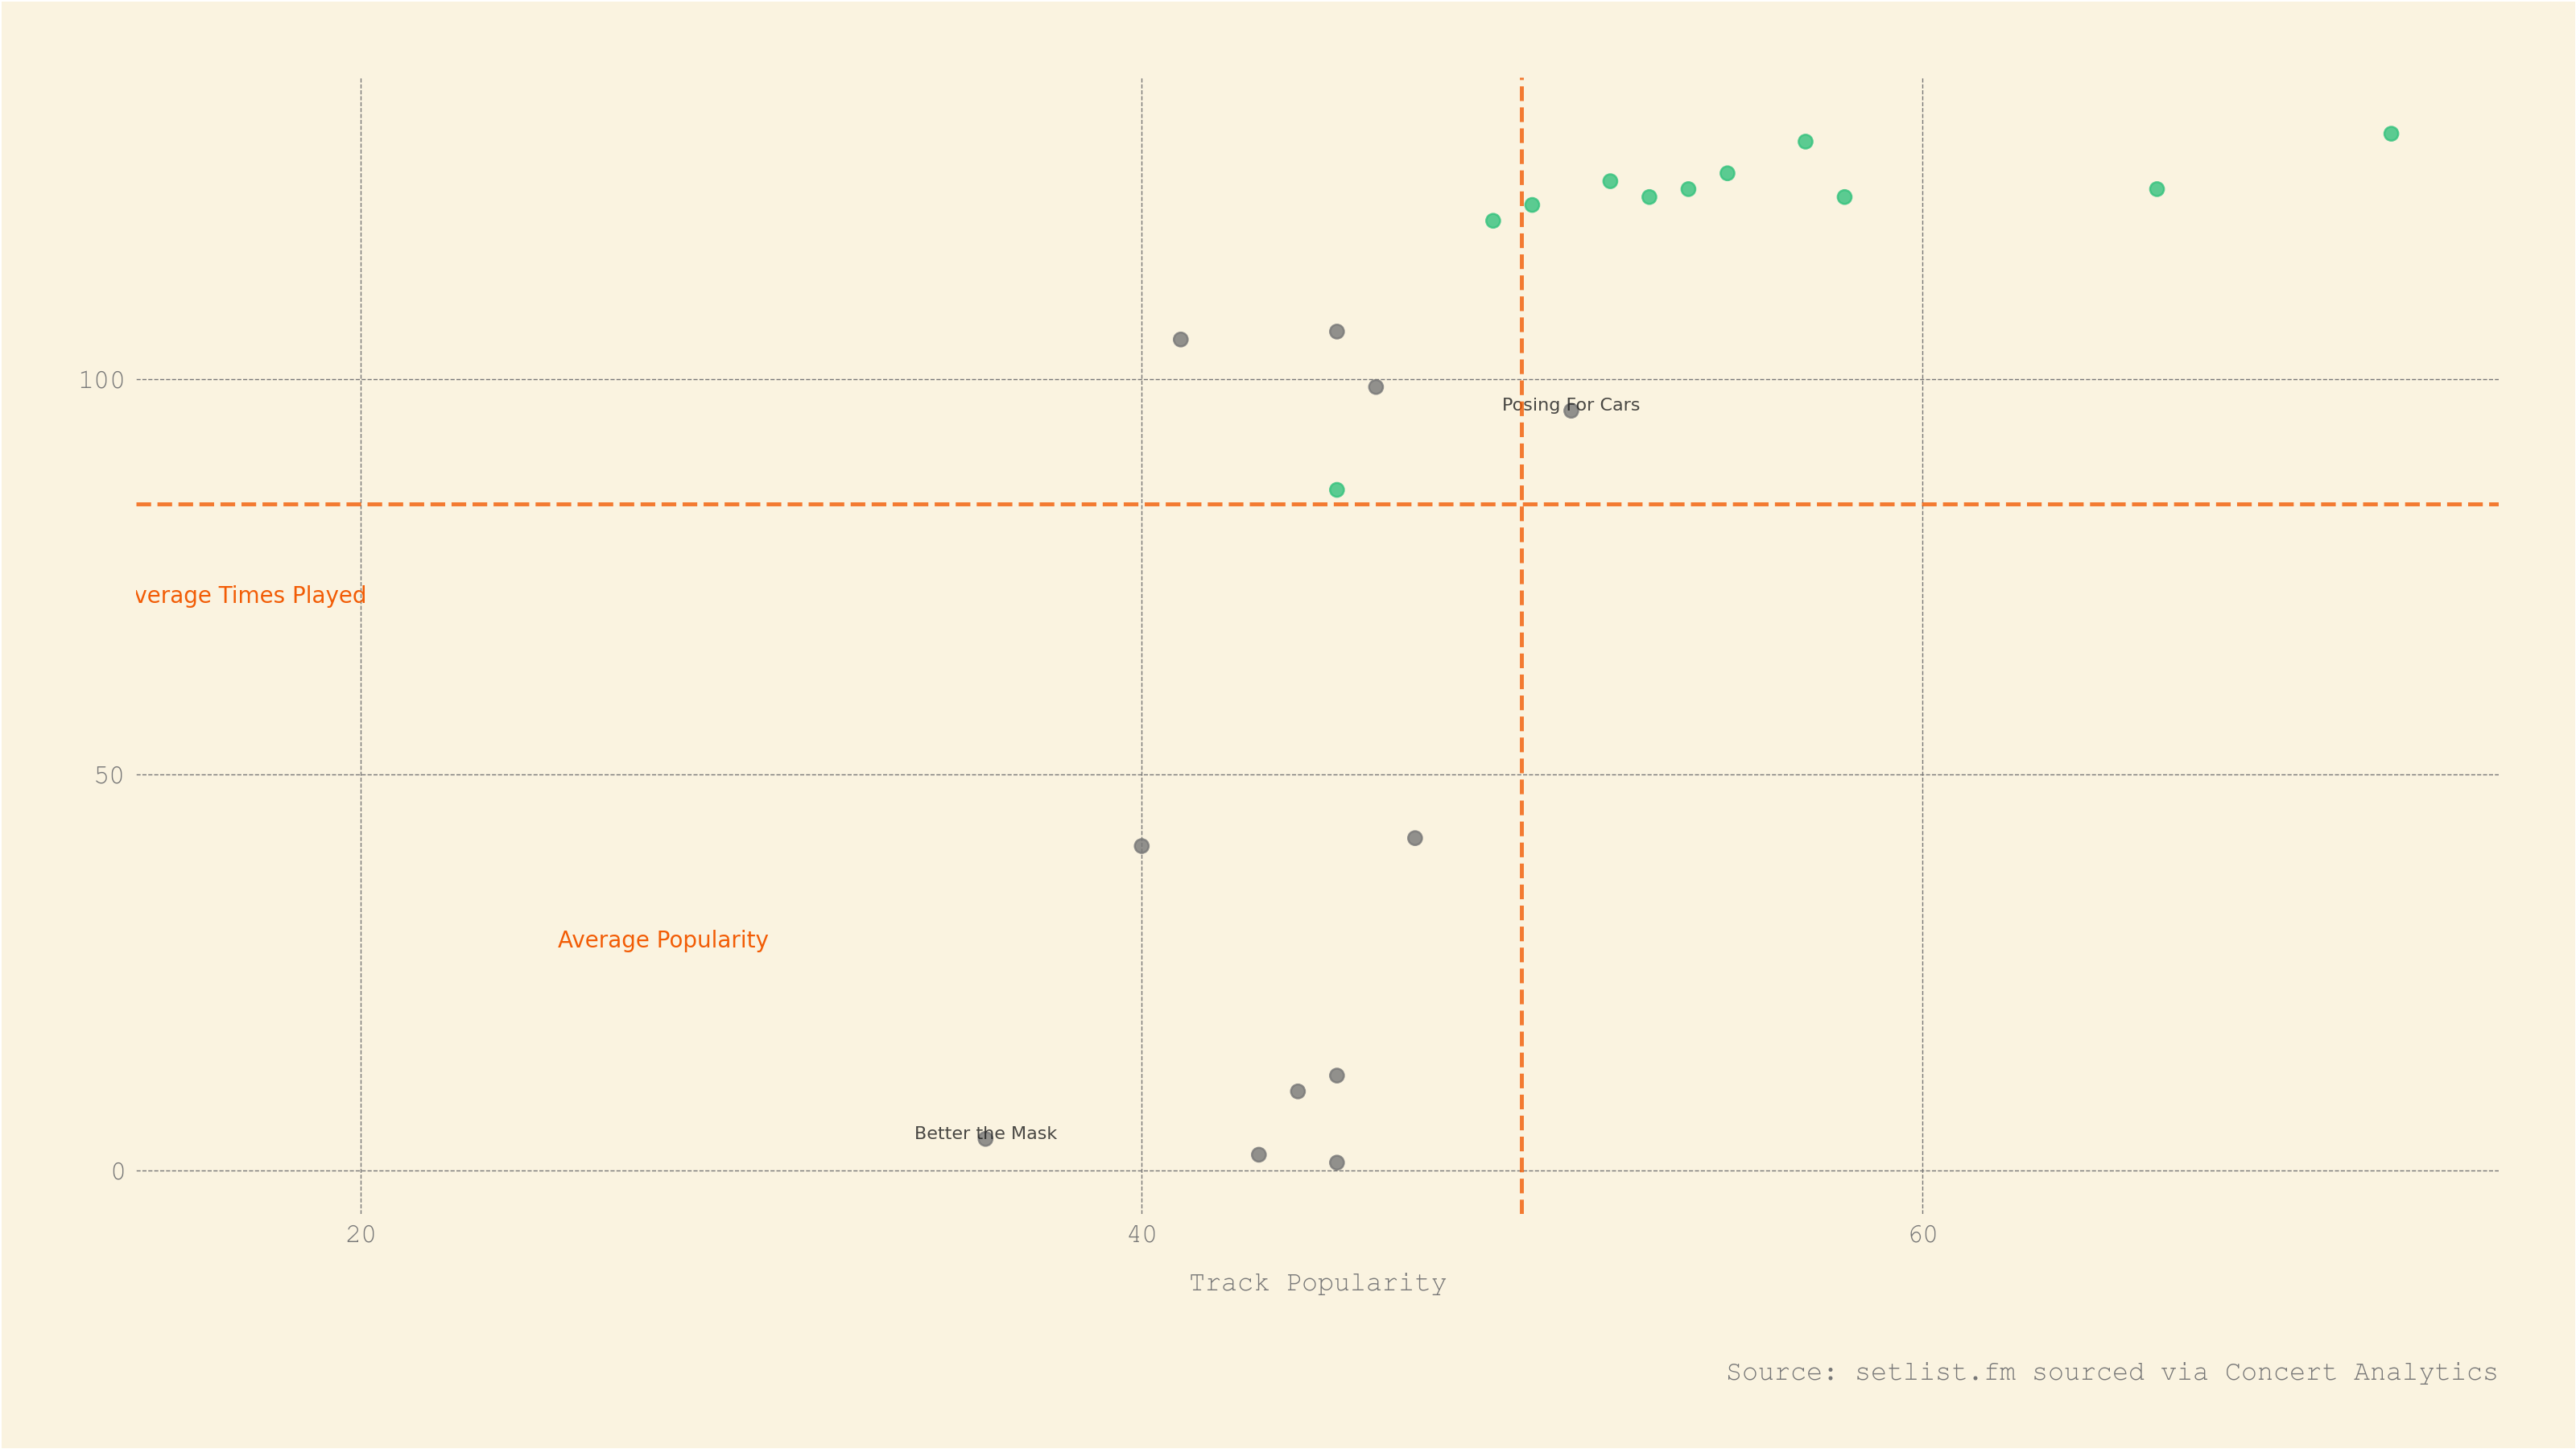

Times Played:63.45945945945946, Standard Dev:39.045980440867254, Average Popularity:78.37837837837837, Standard Dev:5.335162974452042
BillieEilish


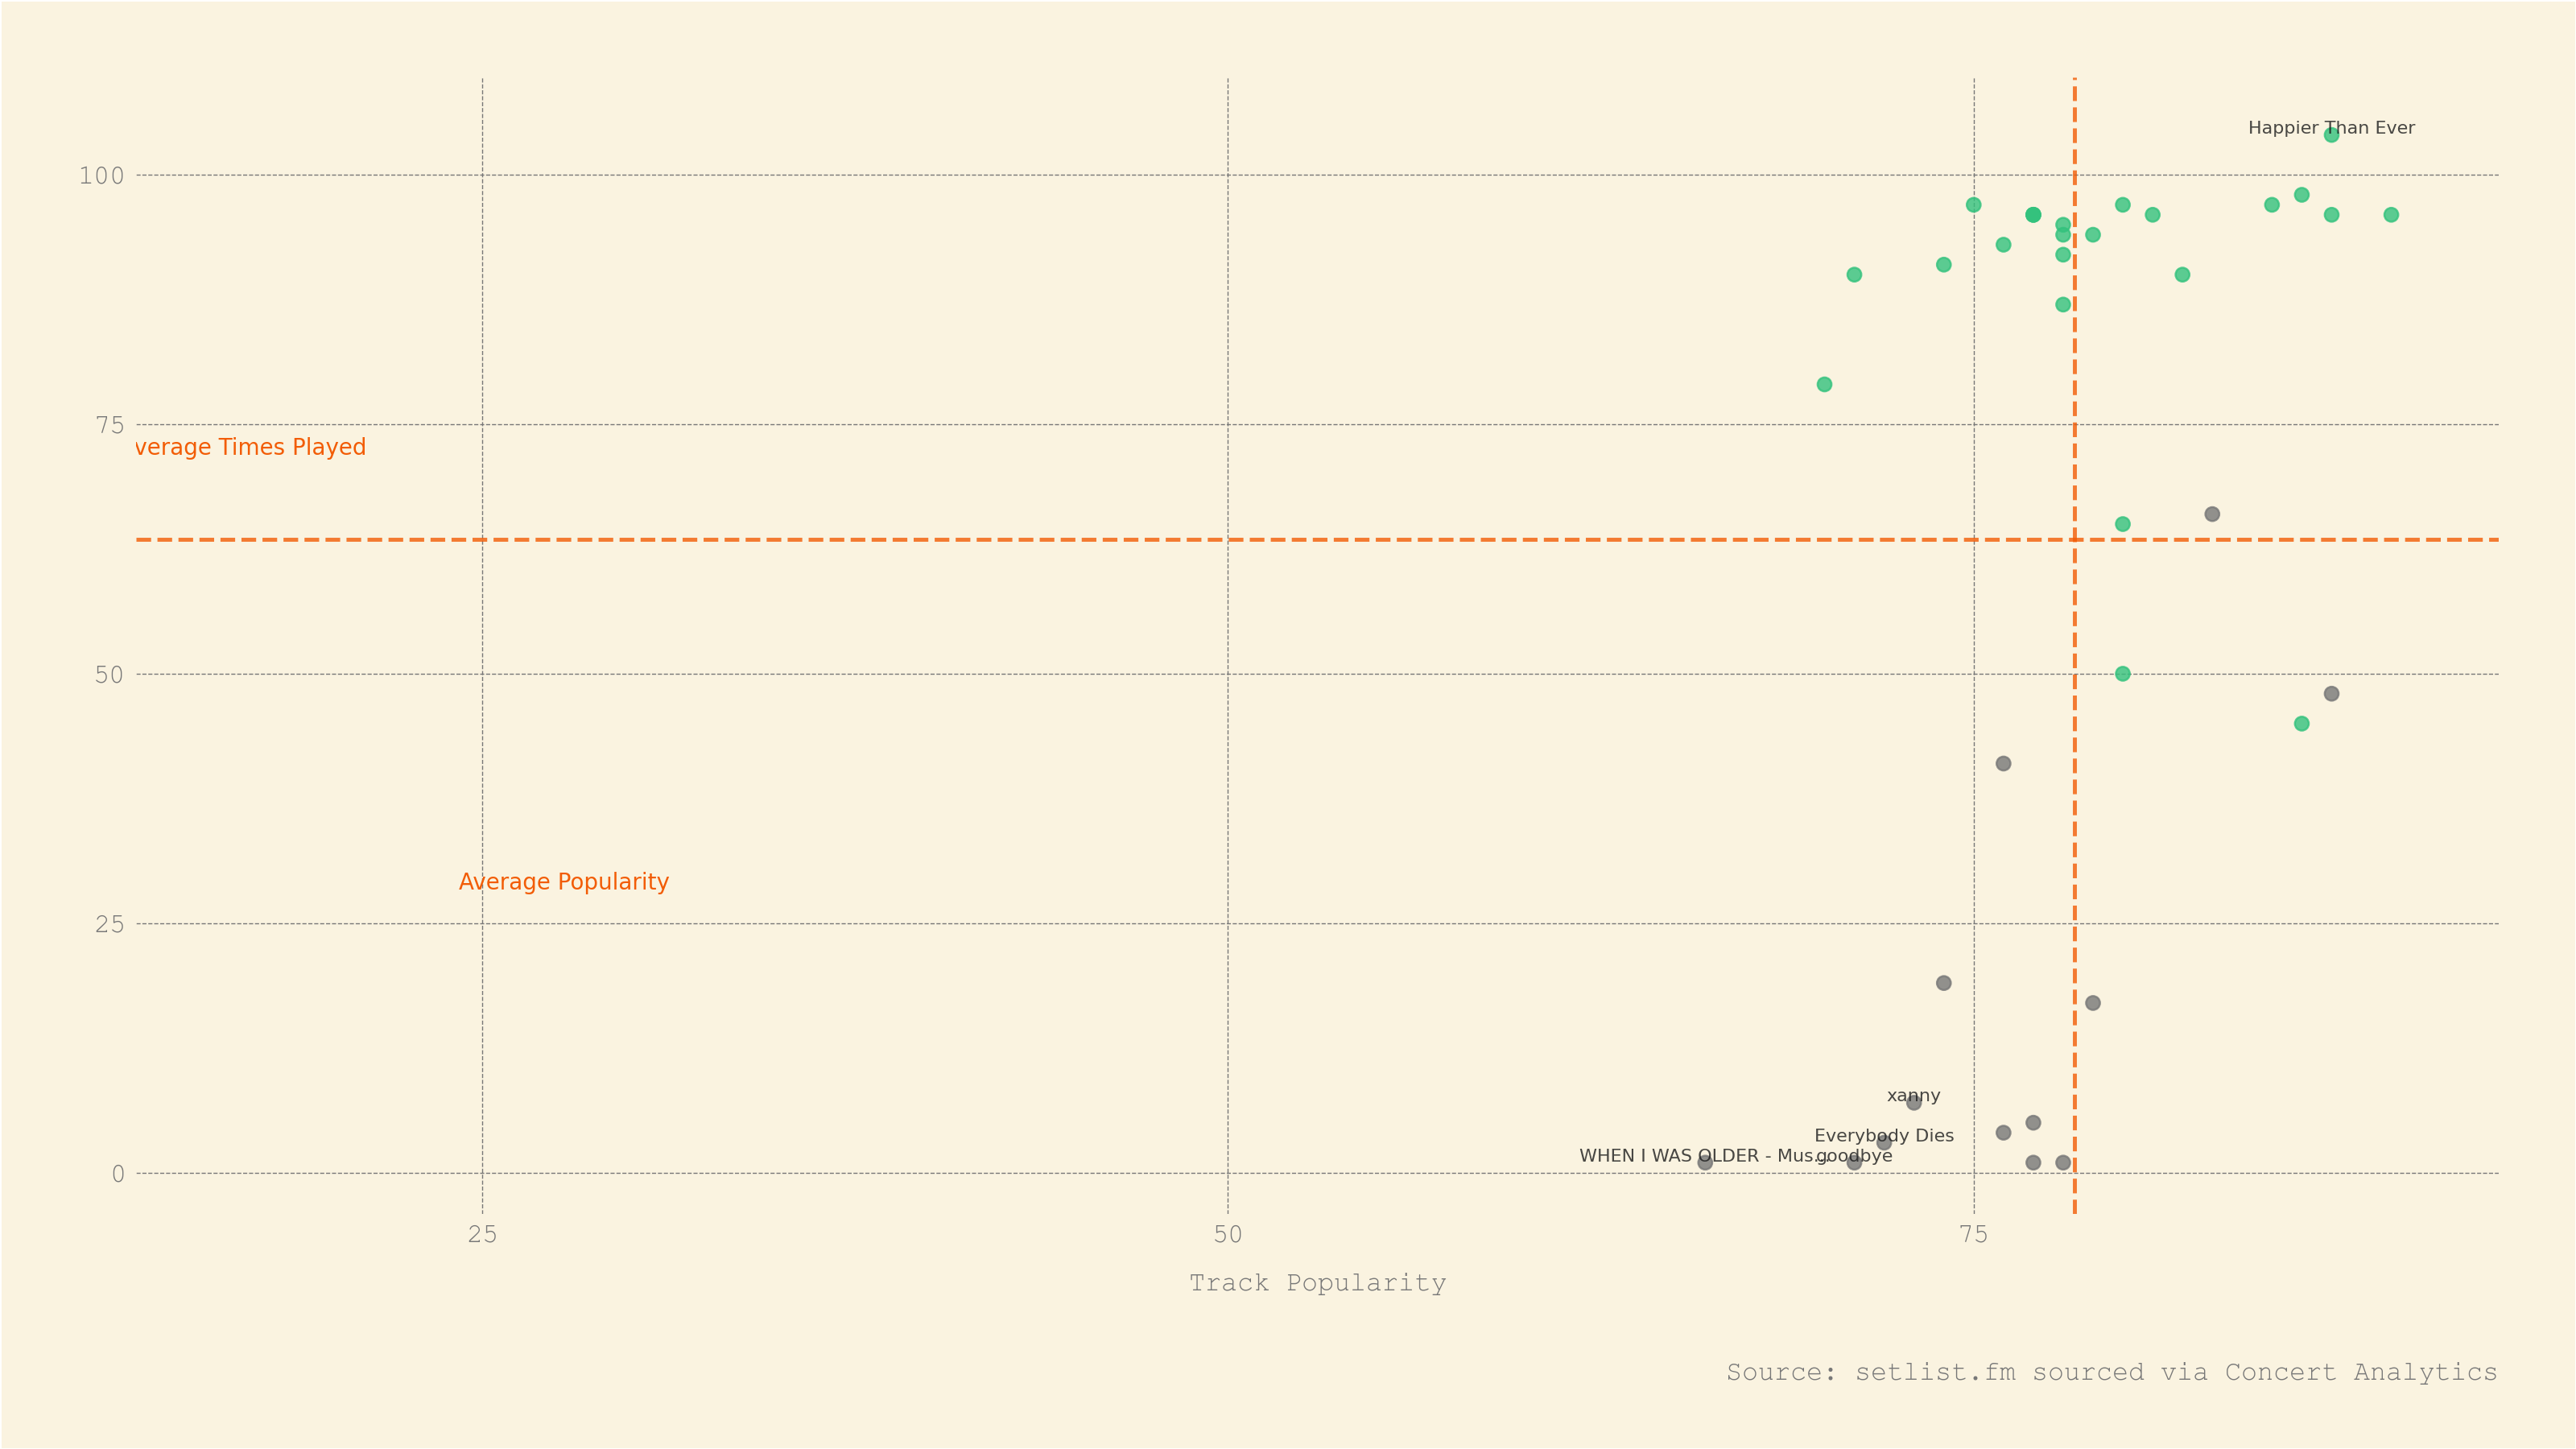

Times Played:72.25806451612904, Standard Dev:48.104031530240434, Average Popularity:56.41935483870968, Standard Dev:6.771381904989986
Turnstile


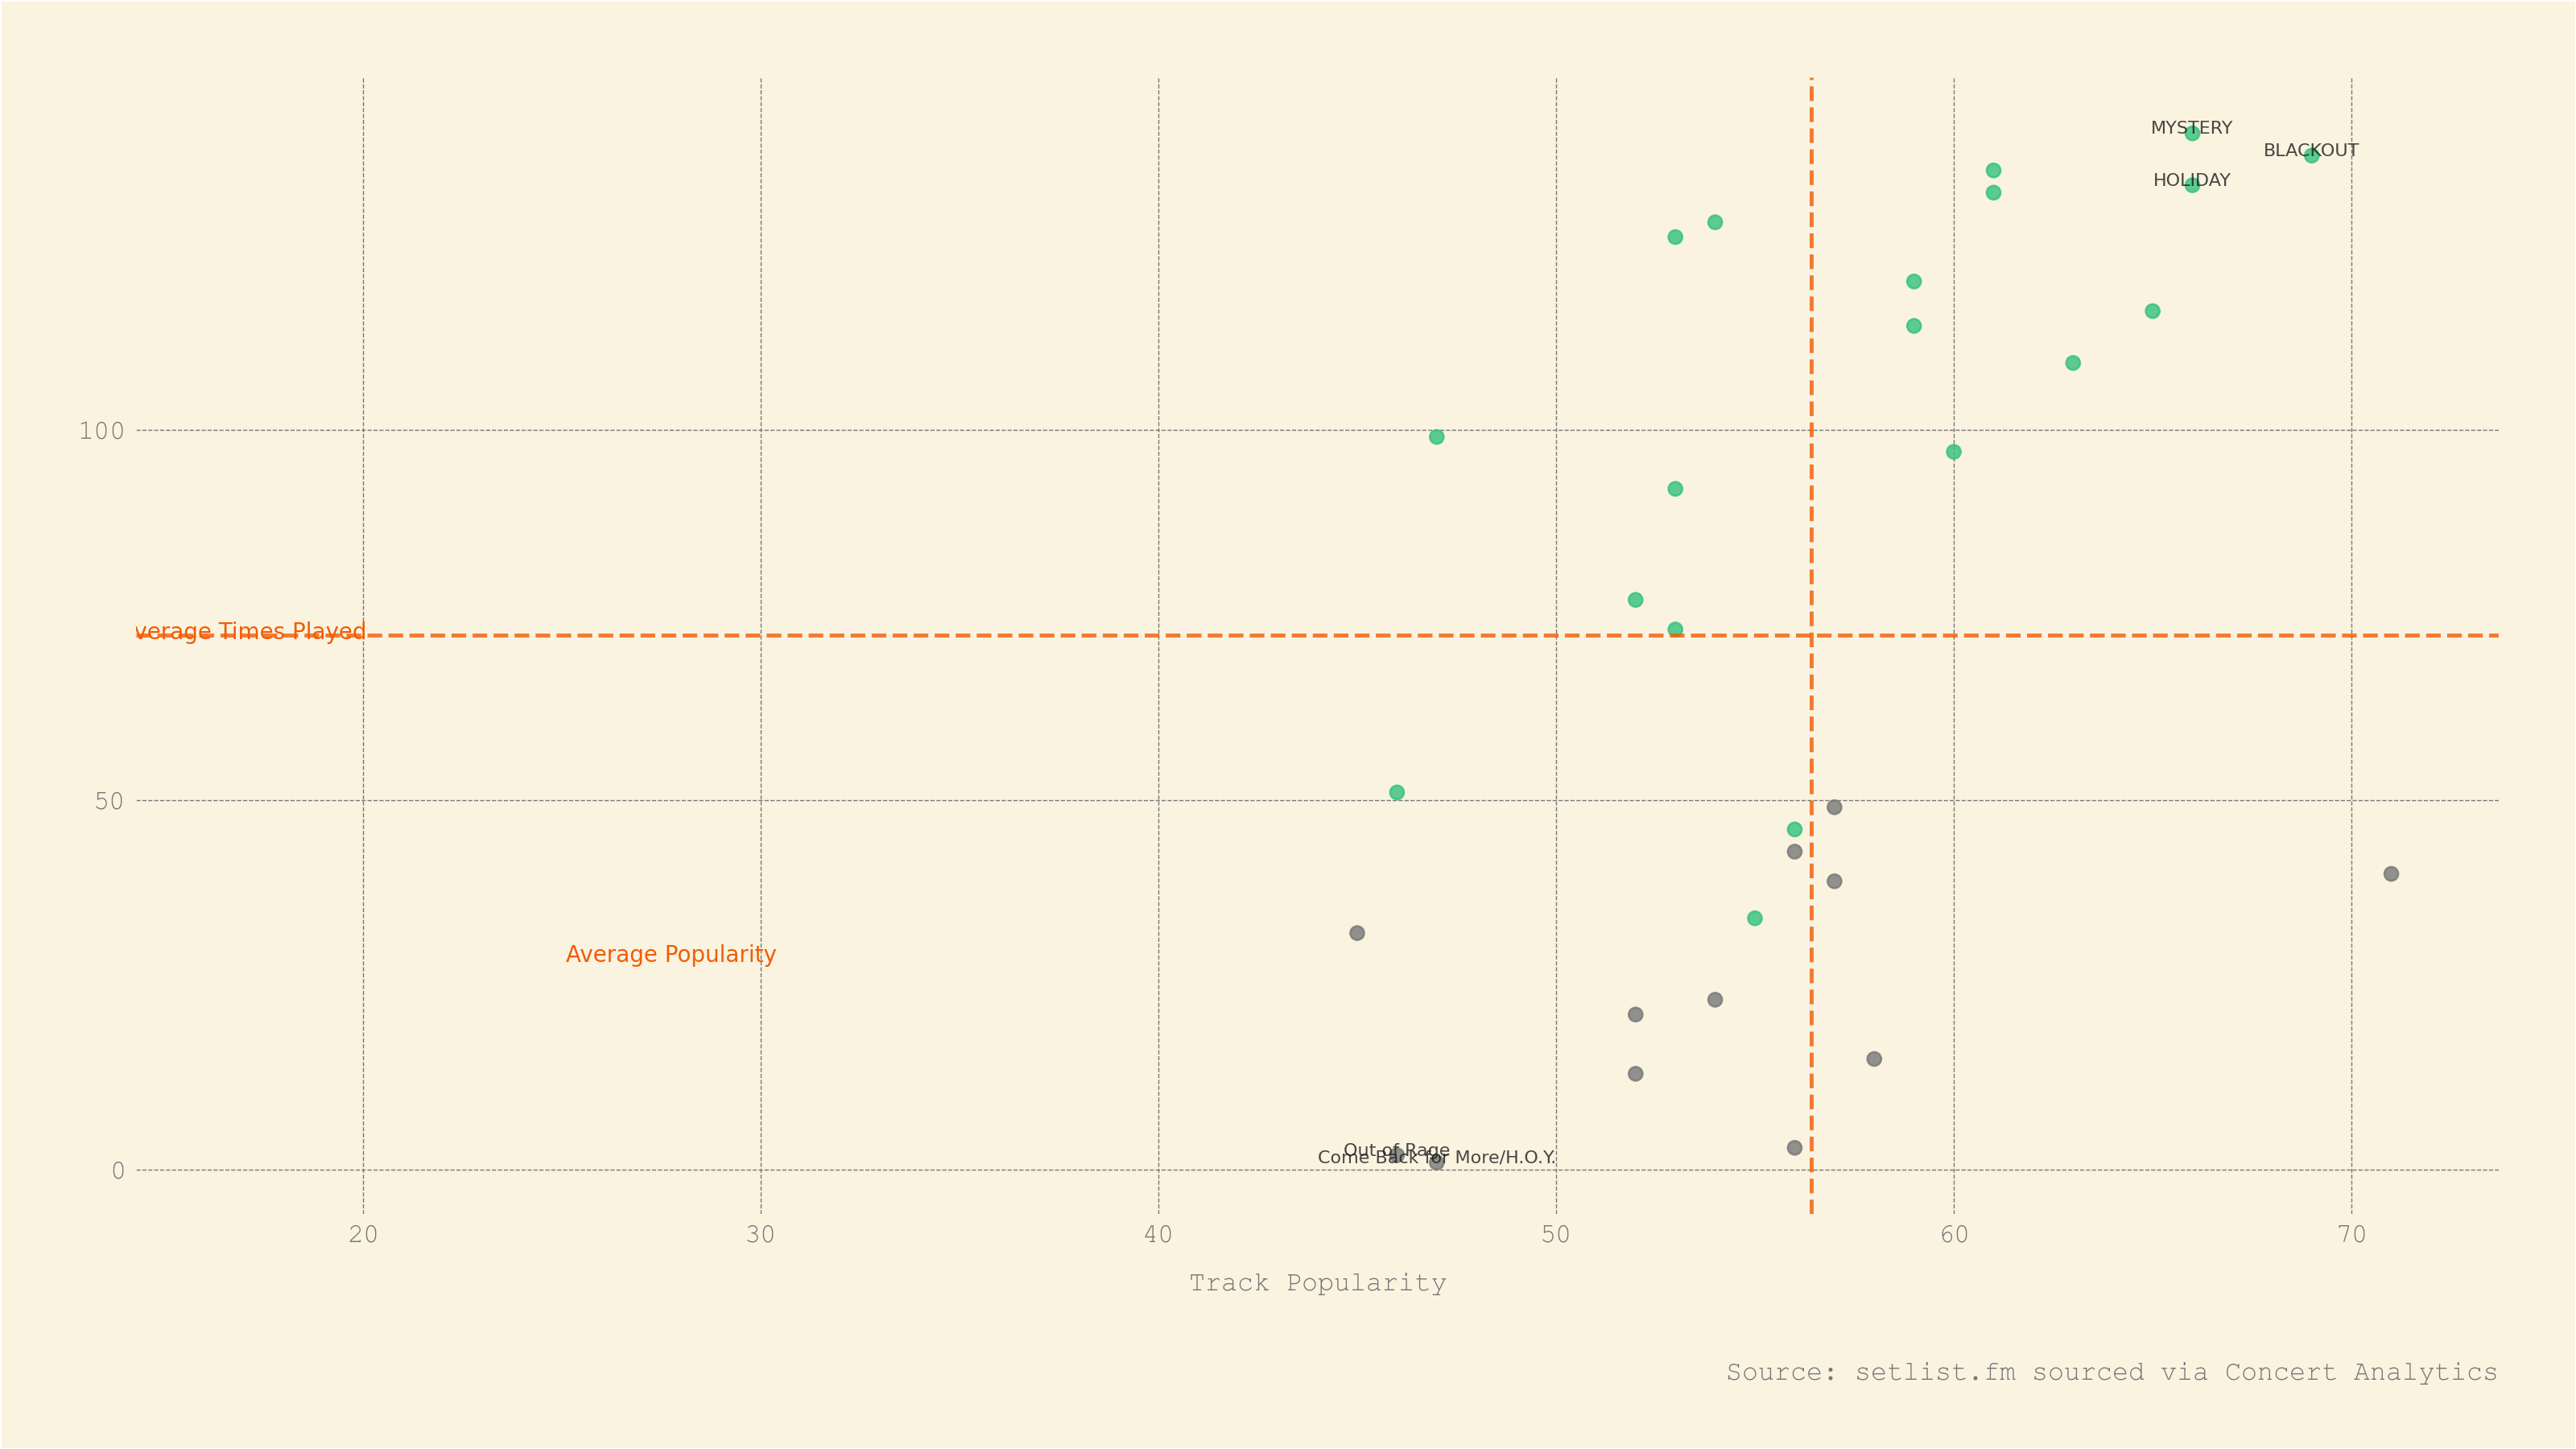

In [4]:
chart_number = "003"

song_stats = (
    df
    .groupby(['artist_name_hint','track_song_name','album_name'], as_index=False)
    .agg(
        times_played=('event_id', 'nunique')
        , avg_popularity=('track_popularity', 'mean')
        , avg_duration=('track_duration_seconds', lambda x: x.mean() / 60)
        , coachella_flag=('is_coachella','any')
    )
)

def is_hero(row, artist_avg_popularity, artist_times_played, artist_std_popularity, artist_std_times_played):
    top_popularity = artist_avg_popularity + (artist_std_popularity)
    top_mid_popularity = artist_avg_popularity + (artist_std_popularity * .25)
    bottom_mid_popularity = artist_avg_popularity - (artist_std_popularity * .25)
    bottom_popularity = artist_avg_popularity - (artist_std_popularity)

    top_times_played = artist_times_played + (artist_std_times_played)
    top_mid_times_played = artist_times_played + (artist_std_times_played*.25)
    bottom_mid_times_played = artist_times_played - (artist_std_times_played*.25)
    bottom_times_played = artist_times_played - (artist_std_times_played)

    return (
        (row['avg_popularity'] > top_popularity and row['times_played'] > top_times_played) # crowd favorite
        or (row['avg_popularity'] < bottom_popularity and row['times_played'] > top_times_played)  # band favorite
        or (row['avg_popularity'] > top_popularity and row['times_played'] < bottom_times_played)  # rare banger
        or (row['avg_popularity'] < bottom_popularity and row['times_played'] < bottom_times_played) # ultra obscurity
        or (
        (row['avg_popularity'] > bottom_mid_popularity and row['avg_popularity'] < top_mid_popularity)
        and (row['times_played'] > bottom_mid_times_played and row['times_played'] < top_mid_times_played)
        )  # the mid point
    )


artists = [
        'JapaneseBreakfast'
        , 'BillieEilish'
        , 'Turnstile'
        ]

from plotnine import *


for artist in artists:
    # Create the base plot

    artist_df = (
        song_stats[song_stats["artist_name_hint"] == artist]
        .reset_index(drop=True)
    )

    avg_times_played = artist_df['times_played'].mean()
    std_times_played = artist_df['times_played'].std()
    avg_popularity = artist_df['avg_popularity'].mean()
    std_popularity = artist_df['avg_popularity'].std()

    print(f"Times Played:{avg_times_played}, Standard Dev:{std_times_played}, Average Popularity:{avg_popularity}, Standard Dev:{std_popularity}")
    artist_df['label'] = artist_df.apply(lambda row: row['track_song_name'] if is_hero(row,avg_popularity,avg_times_played,std_popularity,std_times_played) else '', axis=1)

    scatter_chart = (
        ggplot(artist_df, aes(x='avg_popularity', y='times_played'))
        + geom_point(aes(color='coachella_flag'), size=3, alpha=0.8,show_legend=False)
        + geom_text(aes(label='label'), nudge_y=0.6, size=8, color="#1c1c1c", alpha=0.8)
        + labs(
            x='Track Popularity'
            ,y='Times Played'
        )
        + scale_color_manual(values={
            True:gaffer_colors['stageGreen']
            ,False:gaffer_colors['gafferGrey']
        }
        )
        + geom_vline(
            xintercept=avg_popularity,
            linetype="dashed",
            color="#F25C05",
            size=1,
            alpha=0.8
        )
        + annotate(
            'text',
            x=27.75,
            y=29,
            label='Average Popularity',
            size=10,
            color="#F25C05",
            # family=base_family_axis
        )
        + geom_hline(
            yintercept=avg_times_played,
            linetype="dashed",
            color="#F25C05",
            size=1,
            alpha=0.8
        )
        + annotate(
            'text',
            x=17,
            y=song_stats['times_played'].mean() + 1,
            label='Average Times Played',
            size=10,
            color="#F25C05",
            # family=base_family_axis
        )
        + gaffer_theme(fig_width=16,fig_height=9,panel_grid='both')
        + default_labels
    )

    print(artist)
    display(scatter_chart)

song_stats.to_csv("003-Coachella-Times_Played_vs_Popularity.csv", index=False)

# # scatter_chart
# scatter_chart.save(
#     filename="viz/0002-mewithoutYou-Times_Played_vs_Popularity.svg",
#     format="svg",
#     width=16,      # inches
#     height=9,     # adjust to your chart’s shape
#     dpi=300        # high-quality output
# )